In [21]:
#Question 1
import pandas as pd

file_path = 'westroxbury.xlsx'
df = pd.read_excel(file_path)
df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [22]:
#Question 2
columns = df.columns.tolist()
print(columns)

['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL']


In [23]:
#Question 3
data_types = df.dtypes
print(data_types)

TOTAL VALUE     float64
TAX               int64
LOT SQFT          int64
YR BUILT          int64
GROSS AREA        int64
LIVING AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL BATH         int64
HALF BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL          object
dtype: object


In [24]:
#Question 4
num_rows, num_columns = df.shape
print(num_rows)
print(num_columns)

5802
14


In [26]:
#Question 5
first_column = df.iloc[:, 0]
column_mean = first_column.mean()
column_median = first_column.median()
print(column_mean)
print(column_median)

392.9841462908525
376.1


In [20]:
#Question 6
sam_df = df.sample(frac=0.75, random_state=42)
print(sam_df)

      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
5070         306.3  3853       5300      1954         2578         1227   
1103         305.2  3839       4160      1950         2912         1120   
812          239.2  3009       5086      1920         1910         1070   
1632         396.5  4987       7480      1950         3080         1816   
1128         322.5  4057       4000      1935         3061         1566   
...            ...   ...        ...       ...          ...          ...   
294          313.7  3946       4288      1965         2368         1368   
1547         550.5  6925       5400      1991         5032         2924   
2012         459.9  5785       5750      1951         3109         1869   
588          270.3  3400       3166      1960         2647         1128   
3329         308.4  3879       6375      1920         1965         1061   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
5070      1.0      6  

Number of missing values in the first column: 19


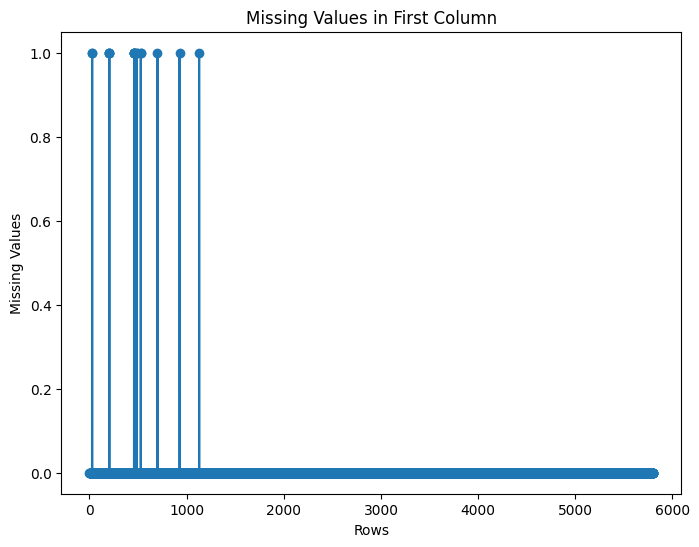

Number of missing values in the first column after imputation: 0


In [35]:
#Question 7
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

first_column_missing = df.iloc[:, 0].isnull().sum()


print("Number of missing values in the first column:", first_column_missing)

plt.figure(figsize=(8, 6))
plt.title('Missing Values in First Column')
plt.xlabel('Rows')
plt.ylabel('Missing Values')

plt.plot(df.iloc[:, 0].isnull().astype(int), marker='o')
plt.show()

first_column_mean = df.iloc[:, 0].mean()
df.iloc[:, 0].fillna(first_column_mean, inplace=True)

print("Number of missing values in the first column after imputation:", df.iloc[:, 0].isnull().sum())

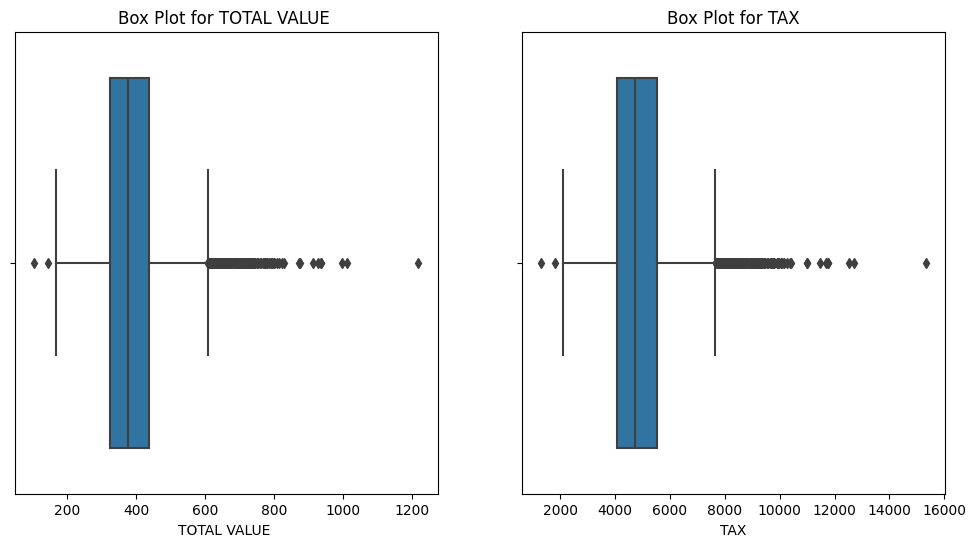

Number of outliers in TOTAL VALUE : 85
Number of outliers in TAX: 85


In [37]:
#Question 8
from scipy.stats import zscore

first_column_name = df.columns[0]
tax_column_name = 'TAX'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df[first_column_name])
plt.title(f'Box Plot for {first_column_name}')

plt.subplot(1, 2, 2)
sns.boxplot(x=df[tax_column_name])
plt.title(f'Box Plot for {tax_column_name}')

plt.show()

z_scores_first_column = zscore(df[first_column_name])
outliers_first_column = (z_scores_first_column > 3) | (z_scores_first_column < -3)

z_scores_tax_column = zscore(df[tax_column_name])
outliers_tax_column = (z_scores_tax_column > 3) | (z_scores_tax_column < -3)

print(f"Number of outliers in {first_column_name}: {sum(outliers_first_column)}")
print(f"Number of outliers in {tax_column_name}: {sum(outliers_tax_column)}")

/var/folders/sm/1phs03r561j3srvbxh6xvtzm0000gn/T/ipykernel_52763/2362451361.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


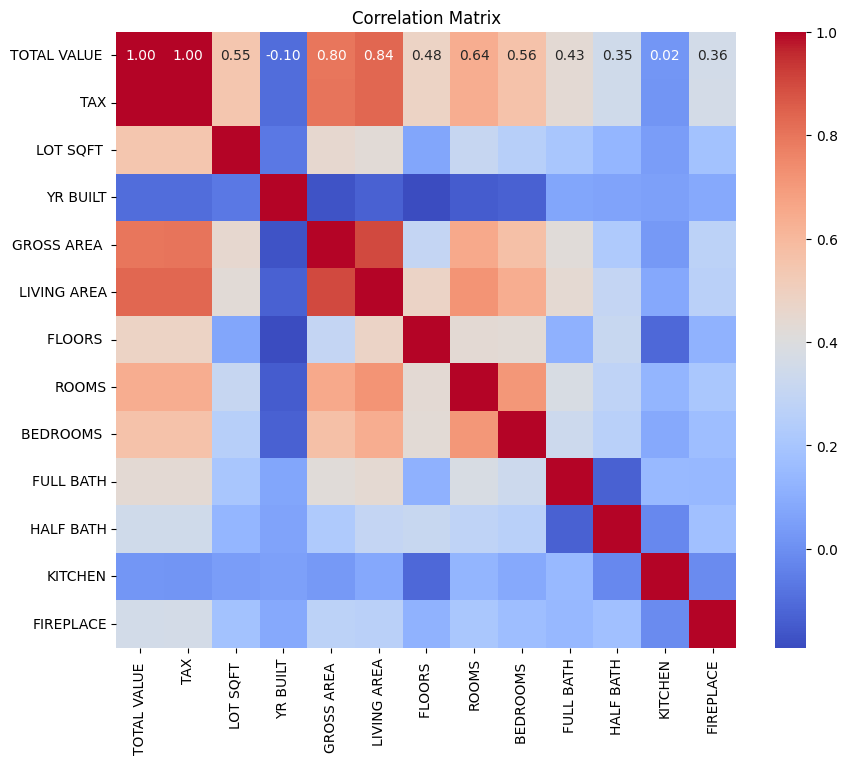

Columns showing multicollinearity: ['ROOMS', 'BEDROOMS ', 'LIVING AREA', 'TAX', 'GROSS AREA ']


In [38]:
#Question 9
from statsmodels.stats.outliers_influence import variance_inflation_factor

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

threshold = 0.7
highly_correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

print(f"Columns showing multicollinearity: {list(highly_correlated_columns)}")

An approach to handle multicollinearity is to remove highly correlated variables with less theoritical importance

In [67]:
#Question 10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_columns = samp_df.select_dtypes(include=['object']).columns

# One-Hot Encoding (for categorical columns with more than two unique values)
samp_df_onehot = pd.get_dummies(samp_df, columns=categorical_columns, drop_first=True)

# Label Encoding (for categorical columns with two unique values)
label_encoder = LabelEncoder()
for column in categorical_columns:
    if len(samp_df[column].unique()) == 2:
        samp_df[column] = label_encoder.fit_transform(samp_df[column])

print(samp_df_onehot.head())

      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
5070         306.3  3853       5300      1954         2578         1227   
1103         305.2  3839       4160      1950         2912         1120   
812          239.2  3009       5086      1920         1910         1070   
1632         396.5  4987       7480      1950         3080         1816   
1128         322.5  4057       4000      1935         3061         1566   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
5070      1.0      6          3          1          1        1          1   
1103      1.0      6          3          1          0        1          1   
812       1.5      6          2          1          0        1          0   
1632      2.0      7          3          1          1        1          0   
1128      2.0      7          3          1          0        1          1   

      REMODEL_Old  REMODEL_Recent  
5070            0               0  
1103          

In [68]:
#Question 11
from sklearn.preprocessing import StandardScaler

non_numeric_cols = sam_df.select_dtypes(exclude=['number']).columns.tolist()

sam_df_numeric = sam_df.drop(columns=non_numeric_cols)

scaler = StandardScaler()

norm_data = scaler.fit_transform(sam_df_numeric)

norm_df = pd.DataFrame(norm_data, columns=sam_df_numeric.columns)

print("Normalized DataFrame (norm_df):")
print(norm_df.head())

Normalized DataFrame (norm_df):
   TOTAL VALUE        TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0     -0.877084 -0.871499  -0.373017  0.442315    -0.389564    -0.791242   
1     -0.888155 -0.882678  -0.803460  0.339640    -0.017783    -0.986374   
2     -1.552426 -1.545457  -0.453820 -0.430425    -1.133124    -1.077558   
3      0.030754  0.034033   0.450110  0.339640     0.169220     0.282898   
4     -0.714035 -0.708599  -0.863873 -0.045392     0.148071    -0.173019   

    FLOORS      ROOMS  BEDROOMS   FULL BATH  HALF BATH   KITCHEN  FIREPLACE  
0 -1.533592 -0.694067  -0.274010  -0.567311   0.711241 -0.125044   0.459658  
1 -1.533592 -0.694067  -0.274010  -0.567311  -1.161306 -0.125044   0.459658  
2 -0.414887 -0.694067  -1.446567  -0.567311  -1.161306 -0.125044  -1.304392  
3  0.703818  0.003688  -0.274010  -0.567311   0.711241 -0.125044  -1.304392  
4  0.703818  0.003688  -0.274010  -0.567311  -1.161306 -0.125044   0.459658  


In [69]:
#Question 12
from sklearn.model_selection import train_test_split

all_columns_except_target = [col for col in norm_df.columns if col != 'ROOMS']

X = norm_df[all_columns_except_target]
y = norm_df['ROOMS']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Training and Testing Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of Training and Testing Data:
X_train shape: (3481, 12)
X_test shape: (871, 12)
y_train shape: (3481,)
y_test shape: (871,)


In [70]:
#Question 13
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Evaluation Metrics:
Mean Squared Error (MSE): 0.35542484805426566
R-squared (R2) Score: 0.6506134096340586
